# Tiền Xử Lý và Trích Xuất Đặc Trưng

Notebook thực hiện tiền xử lý dữ liệu và trích xuất đặc trưng bằng cách sử dụng phương pháp Bag of Words (BoW).

## 1. Chuẩn Bị
### Khai báo thư viện

In [28]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.model_selection import train_test_split
from IPython import display

# Cài đặt NLTK packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2. Chia dataset thành tập train và test

In [16]:
import os
import pandas as pd

# Đường dẫn đến file dữ liệu
data_dir = "../Data"
data_path = os.path.join(data_dir, "Reviews.csv")

# Đọc dữ liệu
df = pd.read_csv(data_path)

print("Thông tin dữ liệu:")
print(f'Shape: {df.shape}')
print(df.info())
display.display(df.head())

Thông tin dữ liệu:
Shape: (568454, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


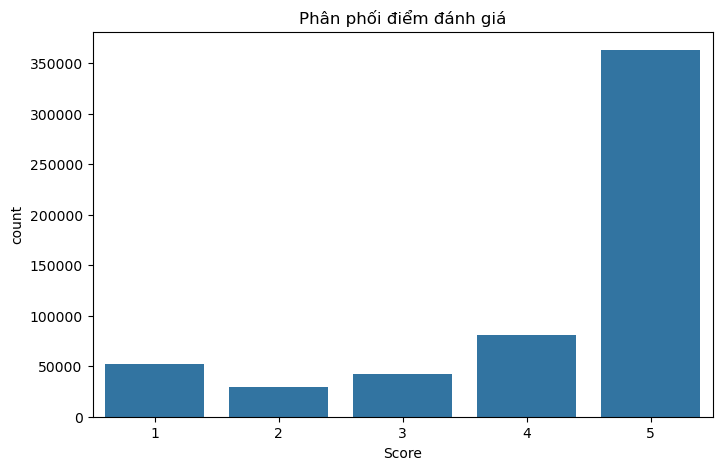

In [17]:
# Phân phối điểm đánh giá
plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=df)
plt.title('Phân phối điểm đánh giá')
plt.show()

In [18]:
# Chia dữ liệu train/test
train, test = train_test_split(df, test_size=0.3, random_state=42)

# Tạo thư mục lưu trữ nếu chưa tồn tại
output_dir = "TrainAndTestData"
os.makedirs(output_dir, exist_ok=True)

# Lưu dữ liệu train và test vào các file riêng biệt
train_file = os.path.join(output_dir, "train.csv")
test_file = os.path.join(output_dir, "test.csv")

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (397917, 10)
Test shape: (170537, 10)


In [19]:
# Kiểm tra lại dữ liệu sau khi lưu
print("\nKiểm tra dữ liệu train sau khi lưu:")
train_check = pd.read_csv(train_file)
print(train_check.head())

print("\nKiểm tra dữ liệu test sau khi lưu:")
test_check = pd.read_csv(test_file)
print(test_check.head())


Kiểm tra dữ liệu train sau khi lưu:
       Id   ProductId          UserId                ProfileName  \
0  421330  B000K5URAI   A82VIFG0K2JEU  Springfield "Springfield"   
1  481427  B0001EQN88   AZLU4FB14D4FE             Philip Spertus   
2   10963  B001BIXK7K   ABZN8ARH3ZG1S                   mdiblasi   
3  277313  B000VK8AVK   A4MB1VMWPKCK4                        Deb   
4   68951  B0018KR8V0  A3718PDT2WSKP9                        CLC   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     0                       0      5  1294531200   
1                     2                       2      5  1122854400   
2                     4                       4      3  1337212800   
3                     0                       0      3  1328227200   
4                     1                       1      5  1270425600   

                                             Summary  \
0                                         Soooo good   
1                    

## 3. Tiền Xử Lý Văn Bản

Hàm này thực hiện các bước tiền xử lý cơ bản cho văn bản:
- Chuyển văn bản thành chữ thường
- Xóa thẻ HTML
- Xóa dấu câu
- Tách từ
- Loại bỏ stopwords
- Lemmatization (chuyển từ về dạng gốc)

In [20]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<br\s*/?>', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

train_check['Text_Cleaned'] = train_check['Text'].map(preprocess_text)

# Lưu dữ liệu đã xử lý
preprocess_dir = "TrichXuatDacTrung"
os.makedirs(preprocess_dir, exist_ok=True)
train_check.to_csv(f"{preprocess_dir}/TrainPreProcess.csv", index=False)

In [21]:
# Hiển thị ví dụ trước và sau khi tiền xử lý
example = train_check['Text'].iloc[0]
print("\nVí dụ trước khi tiền xử lý:")
print(example)
print("\nVí dụ sau khi tiền xử lý:")
print(preprocess_text(example))


Ví dụ trước khi tiền xử lý:
I found this in a store but then they discontinued it where I am.  It is a great alternative to hot chocolate or coffee.  Not to sweet and has great flavor.

Ví dụ sau khi tiền xử lý:
found store discontinued great alternative hot chocolate coffee sweet great flavor


## 4. Trích Xuất Đặc Trưng

In [22]:
# Trích xuất BoW
vectorizer = CountVectorizer(max_features=1000)
bow_matrix = vectorizer.fit_transform(train_check['Text_Cleaned'])

# Tạo DataFrame với đặc trưng
feature_names = vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=feature_names)
bow_df.index = train_check.index

# Thêm đặc trưng độ dài văn bản
train_check['Text_Length'] = train_check['Text'].apply(len)
train_check['Word_Count'] = train_check['Text_Cleaned'].apply(lambda x: len(x.split()))

# Kết hợp các đặc trưng
df_features = pd.concat([train_check[['Text_Length', 'Word_Count']], bow_df], axis=1)

# Lưu đặc trưng
df_features.to_csv(f"{preprocess_dir}/FeatureBoW.csv", index=False)

In [23]:
# Hiển thị thông tin của 5 dòng đã trích xuất đặc trưng BoW
print("\nThông tin của 5 dòng đã trích xuất đặc trưng BoW:")
print(train_check['Text_Cleaned'].head(5))

# Hiển thị các từ trong từ điển BoW
feature_names = vectorizer.get_feature_names_out()
print("\nCác từ trong từ điển BoW:")
print(feature_names[:20])  # Hiển thị 20 từ đầu tiên


Thông tin của 5 dòng đã trích xuất đặc trưng BoW:
0    found store discontinued great alternative hot...
1    tried 2 3 alternative product senseo coffee ma...
2    let get way regularly pop whole habanero peppe...
3    absolutely love bbq popchips favorite saw chil...
4    buy bar 5 box time feed 1 3 year old night tim...
Name: Text_Cleaned, dtype: object

Các từ trong từ điển BoW:
['10' '100' '12' '13' '14' '15' '16' '20' '24' '25' '30' '50' 'able'
 'absolutely' 'acid' 'across' 'actual' 'actually' 'add' 'added']


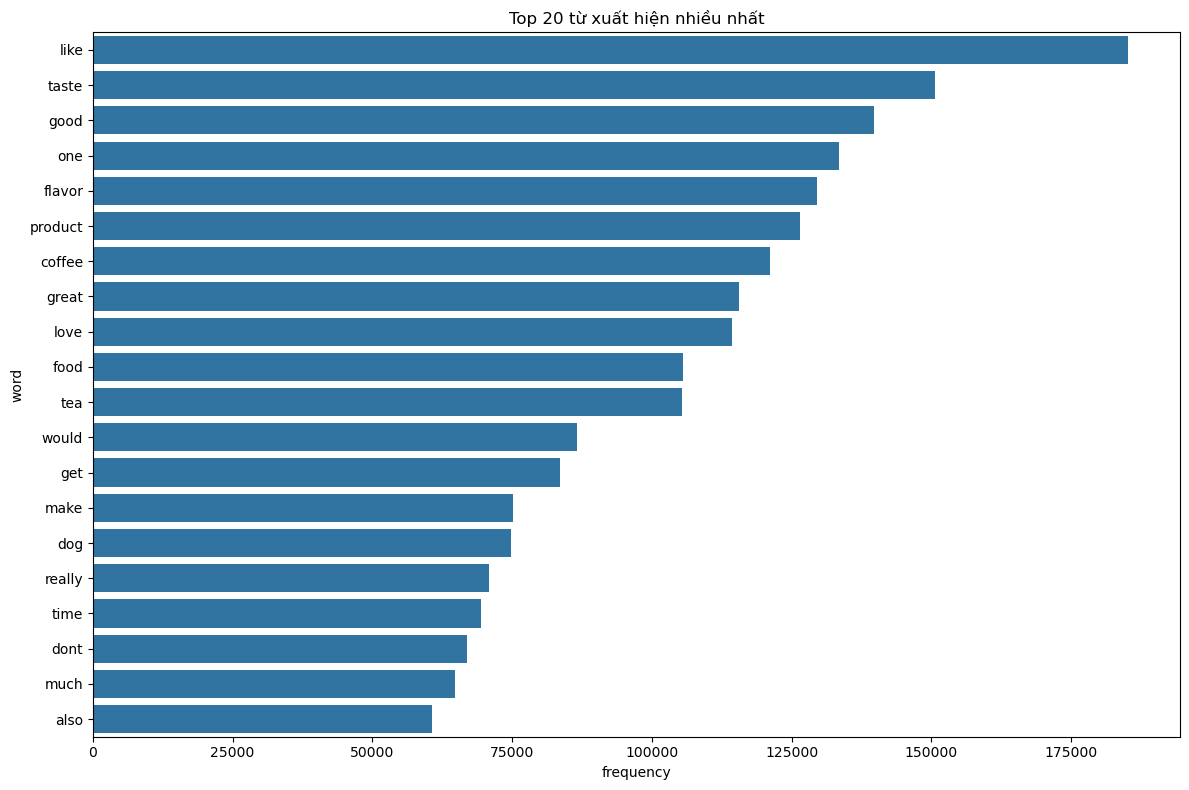

In [24]:
# Biểu đồ top từ xuất hiện nhiều nhất
word_freq = bow_matrix.sum(axis=0).A1
word_freq_df = pd.DataFrame({'word': feature_names, 'frequency': word_freq})
top_words = word_freq_df.nlargest(20, 'frequency')

plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='word', data=top_words)
plt.title('Top 20 từ xuất hiện nhiều nhất')
plt.tight_layout()
plt.show()

In [25]:
# In ra ma trận BoW trích xuất đặc trưng của 5 dòng
print(f"\nĐặc trưng đã trích xuất: {df_features.shape[1]} đặc trưng")
print(df_features.head())

# Lưu kết quả đặc trưng vào FeatureBoW.csv
feature_file = os.path.join(preprocess_dir, "FeatureBoW.csv")
df_features.to_csv(feature_file, index=False)
print(f"Đặc trưng BoW đã được lưu tại: {feature_file}")


Đặc trưng đã trích xuất: 1002 đặc trưng
   Text_Length  Word_Count  10  100  12  13  14  15  16  20  ...  wrong  year  \
0          156          11   0    0   0   0   0   0   0   0  ...      0     0   
1          144          14   0    0   0   0   0   0   0   0  ...      0     0   
2         1273         128   1    0   0   0   0   0   0   0  ...      0     0   
3          234          23   0    0   1   0   0   0   0   0  ...      0     0   
4          743          72   0    0   0   0   0   0   0   0  ...      0     3   

   yes  yet  yogurt  youll  youre  youve  yum  yummy  
0    0    0       0      0      0      0    0      0  
1    0    0       0      0      0      0    0      0  
2    0    0       0      0      2      0    0      0  
3    0    0       0      0      0      0    0      0  
4    0    0       0      0      0      0    0      0  

[5 rows x 1002 columns]
Đặc trưng BoW đã được lưu tại: TrichXuatDacTrung\FeatureBoW.csv


## 5. Phân Tích Đặc Trưng

Phân tích phân bố và mối tương quan giữa các đặc trưng

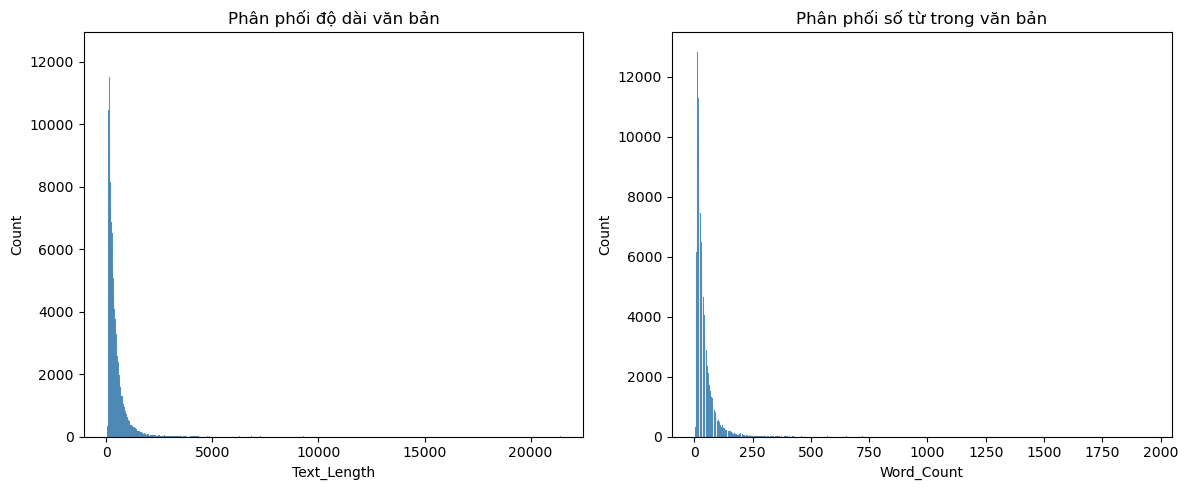

In [26]:
# Phân tích độ dài văn bản và số từ
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_check['Text_Length'])
plt.title('Phân phối độ dài văn bản')

plt.subplot(1, 2, 2)
sns.histplot(train_check['Word_Count'])
plt.title('Phân phối số từ trong văn bản')
plt.tight_layout()
plt.show()

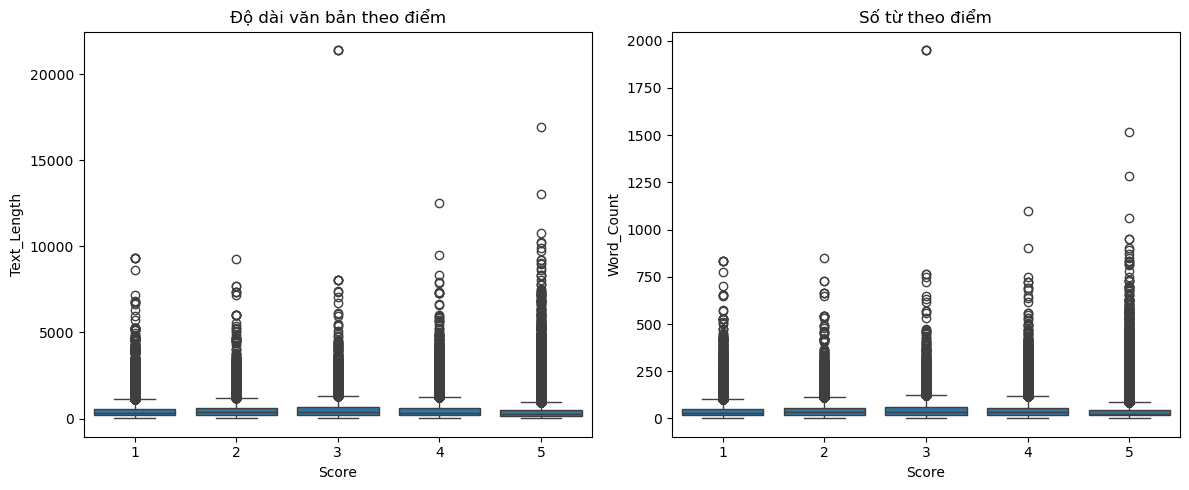

In [27]:
# Phân tích tương quan giữa độ dài và điểm đánh giá
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Score', y='Text_Length', data=train_check)
plt.title('Độ dài văn bản theo điểm')

plt.subplot(1, 2, 2)
sns.boxplot(x='Score', y='Word_Count', data=train_check)
plt.title('Số từ theo điểm')
plt.tight_layout()
plt.show()